In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})


n = 128
L = 30
dx = L/n
x = np.arange(-L/2,L/2,dx,dtype='complex_')
f = np.cos(x) * np.exp(-np.power(x,2)/25) # Function
df = -(np.sin(x) * np.exp(-np.power(x,2)/25) + (2/25)*x*f) # Derivative

In [3]:
## Approximate derivative using finite difference
dfFD = np.zeros(len(df),dtype='complex_')
for kappa in range(len(df)-1):
    dfFD[kappa] = (f[kappa+1]-f[kappa])/dx
    
dfFD[-1] = dfFD[-2]

In [4]:
## Derivative using FFT (spectral derivative)
fhat = np.fft.fft(f)
kappa = (2*np.pi/L)*np.arange(-n/2,n/2)
kappa = np.fft.fftshift(kappa) # Re-order fft frequencies
dfhat = kappa * fhat * (1j)
dfFFT = np.real(np.fft.ifft(dfhat))


<ipython-input-5-3d76b4a10b5e>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x,df.real,color='k',LineWidth=2,label='True Derivative')
C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-5-3d76b4a10b5e>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x,dfFD.real,'--',color='b',LineWidth=1.5,label='Finite Diff.')
C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-5-3d76b4a10b5e>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be

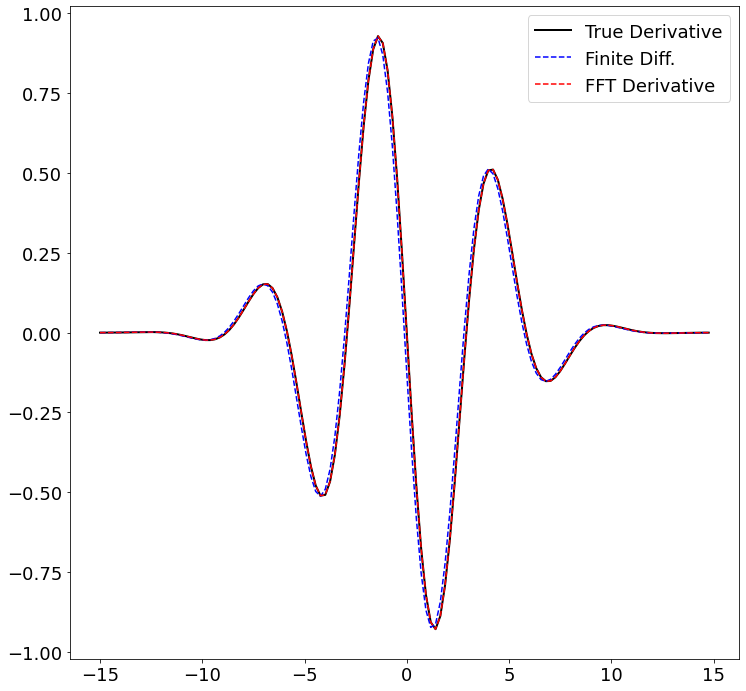

In [5]:
## Plots
plt.plot(x,df.real,color='k',LineWidth=2,label='True Derivative')
plt.plot(x,dfFD.real,'--',color='b',LineWidth=1.5,label='Finite Diff.')
plt.plot(x,dfFFT.real,'--',color='r',LineWidth=1.5,label='FFT Derivative')
plt.legend()
plt.show()